# Homework 4

### Step 1: Data Exploration

2024-11-27 07:32:49.765970: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-27 07:32:50.041475: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-27 07:32:50.177545: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732692770.338287   36827 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732692770.379576   36827 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-27 07:32:50.938243: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)
Number of classes: 10


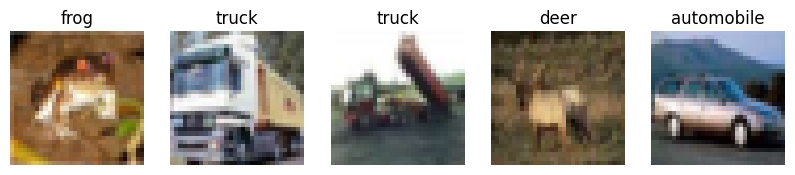

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Optionally, normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Checking the shape of the training and test sets
print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Number of classes: {len(np.unique(y_train))}")

# Visualizing some images with their corresponding labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

# Displaying first 5 images for visualization purpose
fig, axes = plt.subplots(1, 5, figsize=(10, 5))
for i, x in enumerate(axes):
    x.imshow(x_train[i])
    x.set_title(class_names[y_train[i][0]])
    x.axis('off')
plt.show()

### Step 2: Preprocessing

In [2]:
from tensorflow.keras.utils import to_categorical

# Normalizing the image data to range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Converting labels using one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### Step 3: Model Building

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

# Extracting features from the images using different filters
model = Sequential([Input(shape=(32, 32, 3)),
                    Conv2D(32, (3, 3), activation='relu'),
                    MaxPooling2D((2, 2)),
                    Dropout(0.25),
                    
                    Conv2D(64, (3, 3), activation='relu'),
                    MaxPooling2D((2, 2)),
                    Dropout(0.25),
                    
                    # converting the 2D to 1D to connect to the dense layers
                    Flatten(),
                    Dense(128, activation='relu'),
                    Dropout(0.5),
                    # Adding fully connected layers
                    Dense(10, activation='softmax')])


2024-11-27 07:33:01.092596: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


### Step 4: Model Compilation

In [4]:
# Compiling the model with an appropriate loss function, optimizer, and metrics

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Used categorical_crossentropy here as a loss function as it is used for multi-class classification problems that are one-hot encoded.

### Step 5: Training

In [ ]:
# Training the model on training data

history = model.fit(x_train, y_train, 
                    epochs=20, 
                    batch_size=64, 
                    validation_data=(x_test, y_test))

Epoch 1/20


2024-11-27 07:33:02.017686: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 45ms/step - accuracy: 0.0960 - loss: 2.3029 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 44ms/step - accuracy: 0.1000 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.0997 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.0977 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 45ms/step - accuracy: 0.1008 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 6/20


### Step 6: Evaluation

In [ ]:
# Evaluating model's performance on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3404 - loss: 1.8636
Test accuracy: 0.3360


### Step 7: Analysis

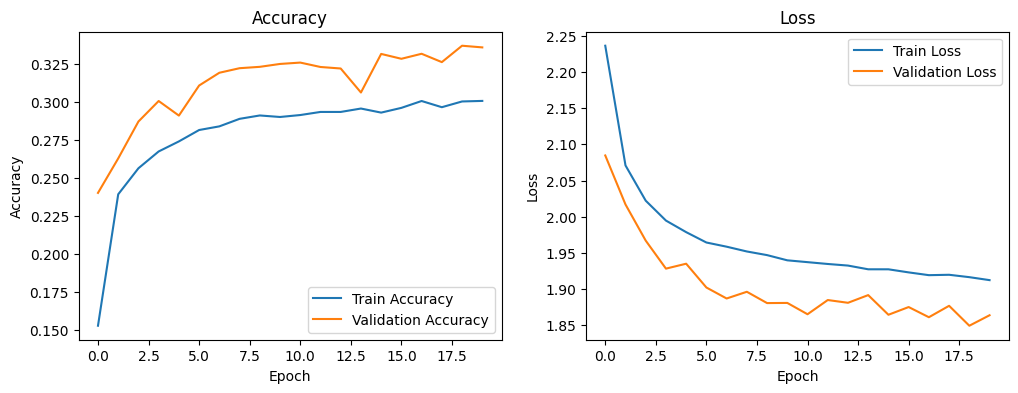

In [ ]:
# Plot accuracy and loss curves
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In the above visualization the accuracy plot compares training and validation accuracy over epochs to assess the model's learning behavior. And the loss plot visualizes how well the model minimizes the loss function during training. As I can see the training performance is quite constant as compared to the validation data.

### Possible improvements:
1. Validation accuracy may not be constant; we can consider using techniques like data augmentation.
2. We can add more convolutional layers or filters to increase model complexity.
3. We can also experiment with optimizers like SGD with momentum.

These look like to me the possible improvements as of now.

### Data Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

datagen.fit(x_train)

# Train the model with augmented data
history_aug = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                        epochs=20,
                        validation_data=(x_test, y_test))


/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 49s 62ms/step - accuracy: 0.2640 - loss: 2.0051 - val_accuracy: 0.3260 - val_loss: 1.8748
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 48s 61ms/step - accuracy: 0.2653 - loss: 1.9975 - val_accuracy: 0.3219 - val_loss: 1.8882
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 48s 61ms/step - accuracy: 0.2682 - loss: 1.9917 - val_accuracy: 0.3154 - val_loss: 1.8813
Epoch 4/20
164/782 ━━━━━━━━━━━━━━━━━━━━ 36s 59ms/step - accuracy: 0.2679 - loss: 1.9915

KeyboardInterrupt: 